<a href="https://colab.research.google.com/github/puttipongyy/BSC_DPDM23/blob/main/test_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
survey = pd.read_excel('/content/drive/MyDrive/Final BSC2-67/dataset_consumer-insight-survey2019.xlsx')

# column ที่ใช้ Association
ช่วงเวลา k 1-10  
ประเภทข่าวที่สนใจ 5 อันดับ ที่พูดขึ้นมาเอง r1 - rr1

In [ ]:
survey_association = survey.copy()

In [ ]:
survey_association = survey_association[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1']]

In [ ]:
survey_association['r2'] = survey_association['r2'].replace({21: 99, 80: 99})
survey_association['r3'] = survey_association['r3'].replace({31: 99})

In [ ]:
survey_association['k1'] = survey_association['k1'].replace({0: 99, 1: 'time01'})
survey_association['k2'] = survey_association['k2'].replace({0: 99, 1: 'time02'})
survey_association['k3'] = survey_association['k3'].replace({0: 99, 1: 'time03'})
survey_association['k4'] = survey_association['k4'].replace({0: 99, 1: 'time04'})
survey_association['k5'] = survey_association['k5'].replace({0: 99, 1: 'time05'})
survey_association['k6'] = survey_association['k6'].replace({0: 99, 1: 'time06'})
survey_association['k7'] = survey_association['k7'].replace({0: 99, 1: 'time07'})
survey_association['k8'] = survey_association['k8'].replace({0: 99, 1: 'time08'})
survey_association['k9'] = survey_association['k9'].replace({0: 99, 1: 'time09'})
survey_association['k10'] = survey_association['k10'].replace({0: 99, 1: 'time10'})

In [ ]:
# Change data type of multiple columns to string using applymap()
# survey_association[['r1', 'r2', 'r3', 'r4', 'r5','rr1']] = survey_association[['r1', 'r2', 'r3', 'r4', 'r5','rr1']].applymap(str)

# print(survey_association[['r1', 'r2', 'r3', 'r4', 'r5','rr1']])


In [ ]:
survey_association['new_column'] = survey_association[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1']].apply(list, axis=1)

In [ ]:
survey_association['new_column']

0       [99, time02, 99, 99, 99, time06, 99, 99, 99, 9...
1       [99, time02, 99, 99, 99, time06, time07, 99, 9...
2       [99, time02, 99, 99, 99, time06, time07, 99, 9...
3       [99, time02, 99, 99, time05, time06, 99, 99, 9...
4       [99, time02, 99, time04, 99, time06, time07, 9...
                              ...                        
2054    [99, 99, time03, 99, 99, 99, time07, 99, 99, 9...
2055    [99, time02, time03, time04, time05, 99, 99, t...
2056    [99, 99, 99, 99, 99, time06, time07, 99, 99, 9...
2057    [99, 99, time03, 99, 99, time06, time07, time0...
2058    [99, 99, 99, 99, 99, time06, time07, time08, 9...
Name: new_column, Length: 2059, dtype: object

In [ ]:
survey_association['no_99'] = survey_association['new_column'].apply(lambda x: [i for i in x if i != 99])

In [ ]:
survey_association['for_association'] = survey_association['no_99'].apply(lambda x: [str(i) for i in x])

In [ ]:
survey_association.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   k1               2059 non-null   object
 1   k2               2059 non-null   object
 2   k3               2059 non-null   object
 3   k4               2059 non-null   object
 4   k5               2059 non-null   object
 5   k6               2059 non-null   object
 6   k7               2059 non-null   object
 7   k8               2059 non-null   object
 8   k9               2059 non-null   object
 9   k10              2059 non-null   object
 10  r1               2059 non-null   int64 
 11  r2               2059 non-null   int64 
 12  r3               2059 non-null   int64 
 13  r4               2059 non-null   int64 
 14  r5               2059 non-null   int64 
 15  rr1              2059 non-null   int64 
 16  new_column       2059 non-null   object
 17  no_99            2059 non-null   

In [ ]:
survey_association

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,r1,r2,r3,r4,r5,rr1,new_column,no_99,for_association
0,99,time02,99,99,99,time06,99,99,99,99,3,15,10,8,4,99,"[99, time02, 99, 99, 99, time06, 99, 99, 99, 9...","[time02, time06, 3, 15, 10, 8, 4]","[time02, time06, 3, 15, 10, 8, 4]"
1,99,time02,99,99,99,time06,time07,99,99,99,2,3,4,8,10,99,"[99, time02, 99, 99, 99, time06, time07, 99, 9...","[time02, time06, time07, 2, 3, 4, 8, 10]","[time02, time06, time07, 2, 3, 4, 8, 10]"
2,99,time02,99,99,99,time06,time07,99,99,99,7,5,3,1,4,99,"[99, time02, 99, 99, 99, time06, time07, 99, 9...","[time02, time06, time07, 7, 5, 3, 1, 4]","[time02, time06, time07, 7, 5, 3, 1, 4]"
3,99,time02,99,99,time05,time06,99,99,99,99,1,3,2,4,15,99,"[99, time02, 99, 99, time05, time06, 99, 99, 9...","[time02, time05, time06, 1, 3, 2, 4, 15]","[time02, time05, time06, 1, 3, 2, 4, 15]"
4,99,time02,99,time04,99,time06,time07,99,99,99,1,3,2,4,15,99,"[99, time02, 99, time04, 99, time06, time07, 9...","[time02, time04, time06, time07, 1, 3, 2, 4, 15]","[time02, time04, time06, time07, 1, 3, 2, 4, 15]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,99,99,time03,99,99,99,time07,99,99,99,3,15,18,99,99,99,"[99, 99, time03, 99, 99, 99, time07, 99, 99, 9...","[time03, time07, 3, 15, 18]","[time03, time07, 3, 15, 18]"
2055,99,time02,time03,time04,time05,99,99,time08,99,99,3,2,99,99,99,99,"[99, time02, time03, time04, time05, 99, 99, t...","[time02, time03, time04, time05, time08, 3, 2]","[time02, time03, time04, time05, time08, 3, 2]"
2056,99,99,99,99,99,time06,time07,99,99,99,3,15,1,18,2,99,"[99, 99, 99, 99, 99, time06, time07, 99, 99, 9...","[time06, time07, 3, 15, 1, 18, 2]","[time06, time07, 3, 15, 1, 18, 2]"
2057,99,99,time03,99,99,time06,time07,time08,99,99,3,99,99,99,99,99,"[99, 99, time03, 99, 99, time06, time07, time0...","[time03, time06, time07, time08, 3]","[time03, time06, time07, time08, 3]"


In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori

In [ ]:
min_sup = 0.2

frequentItemsets = list(apriori(survey_association['for_association'] , min_support = min_sup))

for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'1', '2'}), support=0.2112676056338028, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1', '2'}), confidence=0.2112676056338028, lift=1.0), OrderedStatistic(items_base=frozenset({'1'}), items_add=frozenset({'2'}), confidence=0.49657534246575347, lift=1.36144957408387), OrderedStatistic(items_base=frozenset({'2'}), items_add=frozenset({'1'}), confidence=0.5792276964047935, lift=1.36144957408387)])
yes
RelationRecord(items=frozenset({'3', '1'}), support=0.2248664400194269, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'3', '1'}), confidence=0.2248664400194269, lift=1.0), OrderedStatistic(items_base=frozenset({'1'}), items_add=frozenset({'3'}), confidence=0.5285388127853882, lift=1.0860892370510122), OrderedStatistic(items_base=frozenset({'3'}), items_add=frozenset({'1'}), confidence=0.4620758483033932, lift=1.0860892370510122)])
yes
RelationRecord(items=frozenset({'time07', '1'}), 

In [ ]:
survey_cat = survey[['r1', 'r2', 'r3', 'r4', 'r5','rr1']]
survey_cat.head(5)

,r1,r2,r3,r4,r5,rr1
0,3,15,10,8,4,99
1,2,3,4,8,10,99
2,7,5,3,1,4,99
3,1,3,2,4,15,99
4,1,3,2,4,15,99


In [ ]:
survey_cat['r2'] = survey_cat['r2'].replace({21: 99, 80: 99})
survey_cat['r3'] = survey_cat['r3'].replace({31: 99})

<ipython-input-925-9cf1d7487892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_cat['r2'] = survey_cat['r2'].replace({21: 99, 80: 99})
<ipython-input-925-9cf1d7487892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_cat['r3'] = survey_cat['r3'].replace({31: 99})


In [ ]:
survey_cat.loc[((survey_cat['r2']==21) | (survey_cat['r2']==31) ), 'r2'] = 99

In [ ]:
survey_cat['new_column'] = survey_cat[['r1', 'r2', 'r3', 'r4', 'r5','rr1']].apply(list, axis=1)

<ipython-input-927-7d1061602107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_cat['new_column'] = survey_cat[['r1', 'r2', 'r3', 'r4', 'r5','rr1']].apply(list, axis=1)


In [ ]:
survey

,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,...,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2044,2,2524,2,3.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2055,2045,1,2498,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
2056,2046,2,2517,2,3.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2057,2047,1,2511,2,6.0,NaN,2,2,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3


In [ ]:
survey_time = survey[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']]

In [ ]:
survey_time

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10
0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,1,1,0,0,0
2,0,1,0,0,0,1,1,0,0,0
3,0,1,0,0,1,1,0,0,0,0
4,0,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2054,0,0,1,0,0,0,1,0,0,0
2055,0,1,1,1,1,0,0,1,0,0
2056,0,0,0,0,0,1,1,0,0,0
2057,0,0,1,0,0,1,1,1,0,0


In [ ]:
survey_time['k1'] = survey_time['k1'].replace({0: 99, 1: 'time01'})
survey_time['k2'] = survey_time['k2'].replace({0: 99, 1: 'time02'})
survey_time['k3'] = survey_time['k3'].replace({0: 99, 1: 'time03'})
survey_time['k4'] = survey_time['k4'].replace({0: 99, 1: 'time04'})
survey_time['k5'] = survey_time['k5'].replace({0: 99, 1: 'time05'})
survey_time['k6'] = survey_time['k6'].replace({0: 99, 1: 'time06'})
survey_time['k7'] = survey_time['k7'].replace({0: 99, 1: 'time07'})
survey_time['k8'] = survey_time['k8'].replace({0: 99, 1: 'time08'})
survey_time['k9'] = survey_time['k9'].replace({0: 99, 1: 'time09'})
survey_time['k10'] = survey_time['k10'].replace({0: 99, 1: 'time10'})


<ipython-input-931-3cbe1d3b03f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_time['k1'] = survey_time['k1'].replace({0: 99, 1: 'time01'})
<ipython-input-931-3cbe1d3b03f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_time['k2'] = survey_time['k2'].replace({0: 99, 1: 'time02'})
<ipython-input-931-3cbe1d3b03f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
survey_time

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10
0,99,time02,99,99,99,time06,99,99,99,99
1,99,time02,99,99,99,time06,time07,99,99,99
2,99,time02,99,99,99,time06,time07,99,99,99
3,99,time02,99,99,time05,time06,99,99,99,99
4,99,time02,99,time04,99,time06,time07,99,99,99
...,...,...,...,...,...,...,...,...,...,...
2054,99,99,time03,99,99,99,time07,99,99,99
2055,99,time02,time03,time04,time05,99,99,time08,99,99
2056,99,99,99,99,99,time06,time07,99,99,99
2057,99,99,time03,99,99,time06,time07,time08,99,99


In [ ]:
survey_cat['new_column']

0         [3, 15, 10, 8, 4, 99]
1          [2, 3, 4, 8, 10, 99]
2           [7, 5, 3, 1, 4, 99]
3          [1, 3, 2, 4, 15, 99]
4          [1, 3, 2, 4, 15, 99]
                 ...           
2054    [3, 15, 18, 99, 99, 99]
2055     [3, 2, 99, 99, 99, 99]
2056      [3, 15, 1, 18, 2, 99]
2057    [3, 99, 99, 99, 99, 99]
2058     [2, 15, 18, 19, 7, 99]
Name: new_column, Length: 2059, dtype: object

In [ ]:
# Remove value 2 from all lists in 'list_col'
# df['list_col'] = df['list_col'].apply(lambda x: [i for i in x if i != 2])

In [ ]:
survey_cat['no_99'] = survey_cat['new_column'].apply(lambda x: [i for i in x if i != 99])

<ipython-input-935-96c92e669016>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_cat['no_99'] = survey_cat['new_column'].apply(lambda x: [i for i in x if i != 99])


In [ ]:
survey_cat

,r1,r2,r3,r4,r5,rr1,new_column,no_99
0,3,15,10,8,4,99,"[3, 15, 10, 8, 4, 99]","[3, 15, 10, 8, 4]"
1,2,3,4,8,10,99,"[2, 3, 4, 8, 10, 99]","[2, 3, 4, 8, 10]"
2,7,5,3,1,4,99,"[7, 5, 3, 1, 4, 99]","[7, 5, 3, 1, 4]"
3,1,3,2,4,15,99,"[1, 3, 2, 4, 15, 99]","[1, 3, 2, 4, 15]"
4,1,3,2,4,15,99,"[1, 3, 2, 4, 15, 99]","[1, 3, 2, 4, 15]"
...,...,...,...,...,...,...,...,...
2054,3,15,18,99,99,99,"[3, 15, 18, 99, 99, 99]","[3, 15, 18]"
2055,3,2,99,99,99,99,"[3, 2, 99, 99, 99, 99]","[3, 2]"
2056,3,15,1,18,2,99,"[3, 15, 1, 18, 2, 99]","[3, 15, 1, 18, 2]"
2057,3,99,99,99,99,99,"[3, 99, 99, 99, 99, 99]",[3]


In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori

In [ ]:
min_sup = 0.1

frequentItemsets = list(apriori(survey_cat['new_column'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({1, 2}), support=0.2112676056338028, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1, 2}), confidence=0.2112676056338028, lift=1.0), OrderedStatistic(items_base=frozenset({1}), items_add=frozenset({2}), confidence=0.49657534246575347, lift=1.36144957408387), OrderedStatistic(items_base=frozenset({2}), items_add=frozenset({1}), confidence=0.5792276964047935, lift=1.36144957408387)])
yes
RelationRecord(items=frozenset({1, 3}), support=0.2248664400194269, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1, 3}), confidence=0.2248664400194269, lift=1.0), OrderedStatistic(items_base=frozenset({1}), items_add=frozenset({3}), confidence=0.5285388127853882, lift=1.0860892370510122), OrderedStatistic(items_base=frozenset({3}), items_add=frozenset({1}), confidence=0.4620758483033932, lift=1.0860892370510122)])
yes
RelationRecord(items=frozenset({1, 99}), support=0.4254492472073822, ordered_stat

#Decision tree

In [ ]:
classification_data = survey.copy()

In [ ]:
classification_data

,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,...,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2044,2,2524,2,3.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2055,2045,1,2498,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
2056,2046,2,2517,2,3.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2057,2047,1,2511,2,6.0,NaN,2,2,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3


In [ ]:
classification_data

,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,...,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2044,2,2524,2,3.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2055,2045,1,2498,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
2056,2046,2,2517,2,3.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2057,2047,1,2511,2,6.0,NaN,2,2,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3


In [ ]:
# classification_data['a7'].describe() # ดูรายได้กลุ่มอาชีพนักเรียน/นักศึกษา

In [ ]:
classification_data1 = classification_data[['a1','a5','a81','a91', 'J5new','x1', 'x2','x3','x4', 'Gen_group', 'q1']]
classification_data1

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group,q1
0,1,7,1,5,3,1,1,0,0,2,1
1,2,4,3,5,3,1,1,1,1,2,1
2,2,4,1,5,3,1,1,0,0,2,1
3,2,2,1,5,4,1,1,1,1,3,1
4,2,6,4,5,3,1,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
2054,2,7,6,3,2,0,0,0,1,3,1
2055,1,6,4,3,1,0,0,0,1,4,99
2056,2,4,6,3,1,1,0,1,1,3,1
2057,1,2,4,3,1,1,1,1,1,3,1


In [ ]:
#classification_data1 = classification_data[['a1','a5','a81','a91', 'J5new', 'v1' ,'x1', 'x2','x3','x4', 'Gen_group', 'q1']]
#classification_data1

In [ ]:
# Reorder columns using reindex() with a list
# df = df.reindex(columns=['col3', 'col1', 'col2'])

# data Preprocessing

In [ ]:
classification_data1.describe()

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group,q1
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.00000
mean,1.561438,4.125789,2.726566,2.590092,1.457989,0.161729,0.050024,0.022827,0.101020,2.516270,23.14473
std,0.496332,1.924273,1.570045,1.334676,1.092228,0.368291,0.218048,0.149387,0.301428,1.098237,40.48163
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.00000
50%,2.000000,4.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.00000
75%,2.000000,5.000000,4.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.00000
max,2.000000,9.000000,9.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,4.000000,99.00000


In [ ]:
classification_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   a1         2059 non-null   int64
 1   a5         2059 non-null   int64
 2   a81        2059 non-null   int64
 3   a91        2059 non-null   int64
 4   J5new      2059 non-null   int64
 5   x1         2059 non-null   int64
 6   x2         2059 non-null   int64
 7   x3         2059 non-null   int64
 8   x4         2059 non-null   int64
 9   Gen_group  2059 non-null   int64
 10  q1         2059 non-null   int64
dtypes: int64(11)
memory usage: 177.1 KB


แปลงค่าใน q1 ให้เป็น 0 หากไม่ได้เลือก facebook เป็นช่องทางติดตามข่าวออนไลน์อันดับที่ 1 และให้เป็น 1 หากมีการติดตามผ่าน facebook เป็นอันดับที่ 1

In [ ]:
classification_data1.loc[(classification_data['q1'] != 1), 'q1'] = 0

<ipython-input-949-fc5b8e05c766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_data1.loc[(classification_data['q1'] != 1), 'q1'] = 0


In [ ]:
classification_data1.describe()

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group,q1
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,1.561438,4.125789,2.726566,2.590092,1.457989,0.161729,0.050024,0.022827,0.101020,2.516270,0.600777
std,0.496332,1.924273,1.570045,1.334676,1.092228,0.368291,0.218048,0.149387,0.301428,1.098237,0.489858
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,2.000000,4.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,2.000000,5.000000,4.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,2.000000,9.000000,9.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


ให้รายได้ของคนที่มีอาชีพ นักเรียน/นักศึกษา จัดอยู่ในกลุ่มที่ 1 ไม่เกิย 18000 บาท

In [ ]:
# classification_data.loc[(classification_data['a5']==5), 'a6'] = 1

In [ ]:
# classification_data.loc[(classification_data['a5']==5)]

J5new

In [ ]:
classification_data1.loc[(classification_data['J5new']==0), 'J5new'] = 9

<ipython-input-953-41638da2e3c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_data1.loc[(classification_data['J5new']==0), 'J5new'] = 9


V1

In [ ]:
# classification_data.loc[(classification_data['J5new']==0), 'J5new'] = 9

In [ ]:
classification_data1[classification_data1['J5new']==9]

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group,q1
8,2,2,1,5,9,1,1,1,1,3,1
55,2,5,1,5,9,1,1,0,0,2,1
70,1,7,4,5,9,0,0,0,1,3,0
72,1,7,2,5,9,0,0,0,1,3,1
73,1,4,4,5,9,0,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
2028,1,2,6,3,9,1,0,0,0,4,0
2029,2,7,4,3,9,1,0,0,0,4,0
2030,1,7,4,3,9,1,0,0,0,4,0
2044,2,6,5,3,9,1,0,0,0,4,0


แก้ให้ค่า 9 เป็น nan เพื่อให้ใช้ drop ข้อมูลได้

In [ ]:
classification_data1.loc[(classification_data1['a5']==9)] = np.nan

In [ ]:
#classification_data1.loc[(classification_data1['v1']==9)] = np.nan

In [ ]:
# classification_data.loc[(classification_data['a6']==9)] = np.nan

In [ ]:
classification_data.isnull().any()

id           False
a1           False
a2           False
a301         False
a302          True
             ...  
G_genZ        True
G_genY        True
G_genX        True
G_genB        True
Gen_group    False
Length: 200, dtype: bool

In [ ]:
len_source = len(classification_data1)
len_source

2059

In [ ]:
classification_data_no_na = classification_data1.dropna()

In [ ]:
len_no_na = len(classification_data_no_na)
len_no_na

2017

## data lost

In [ ]:
data_lost = ((len_source - len_no_na)/len_source)*100
print(data_lost)

2.0398251578436133


In [ ]:
classification_data_no_na

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group,q1
0,1.0,7.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,2.0,1.0
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,4.0,5.0,3.0,1.0,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,6.0,3.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [ ]:
classification_data_no_na.describe()

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group,q1
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1.555280,4.024294,2.704016,2.596430,3.604363,0.161626,0.049579,0.022310,0.102628,2.512643,0.601388
std,0.497058,1.809615,1.562250,1.337326,3.106755,0.368199,0.217127,0.147728,0.303547,1.107319,0.489734
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,2.000000,4.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,2.000000,5.000000,4.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,2.000000,8.000000,9.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# ready for classification

In [ ]:
clean_data = classification_data_no_na.copy()

#

In [ ]:
clean_data

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group,q1
0,1.0,7.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,2.0,1.0
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,4.0,5.0,3.0,1.0,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,6.0,3.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_data = clean_data.iloc[:, :-1]
y_data = clean_data.iloc[:, -1]

In [ ]:
x_data

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group
0,1.0,7.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,2.0
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,2.0
2,2.0,4.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,2.0
3,2.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,1.0,3.0
4,2.0,6.0,4.0,5.0,3.0,1.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,0.0,0.0,0.0,1.0,3.0
2055,1.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0
2056,2.0,4.0,6.0,3.0,1.0,1.0,0.0,1.0,1.0,3.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0


## Dtree

In [ ]:
np.random.seed(seed=1)

In [ ]:
a = np.random.randint(2, size=len(clean_data))

In [ ]:
a

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
train = clean_data[a == 1]
train.shape

(988, 11)

In [ ]:
test = clean_data[a == 0]
test.shape

(1029, 11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
X_train = train.iloc[:,:-1]

In [ ]:
y_train = train.iloc[:,-1]

In [ ]:
X_train

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group
0,1.0,7.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,2.0
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,2.0
4,2.0,6.0,4.0,5.0,3.0,1.0,0.0,0.0,0.0,4.0
5,1.0,2.0,1.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0
6,2.0,3.0,4.0,5.0,2.0,1.0,1.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2053,1.0,1.0,6.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0
2054,2.0,7.0,6.0,3.0,2.0,0.0,0.0,0.0,1.0,3.0
2055,1.0,6.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0


In [ ]:
y_train

0       1.0
1       1.0
4       1.0
5       1.0
6       1.0
       ... 
2053    1.0
2054    1.0
2055    0.0
2057    1.0
2058    1.0
Name: q1, Length: 988, dtype: float64

## tree plot

In [ ]:
Dtree_tree = DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 8)

In [ ]:
Dtree_tree = DecisionTreeClassifier(criterion='entropy', max_depth =  )

SyntaxError: invalid syntax (<ipython-input-736-4e21301e5298>, line 1)

In [ ]:
Dtree_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

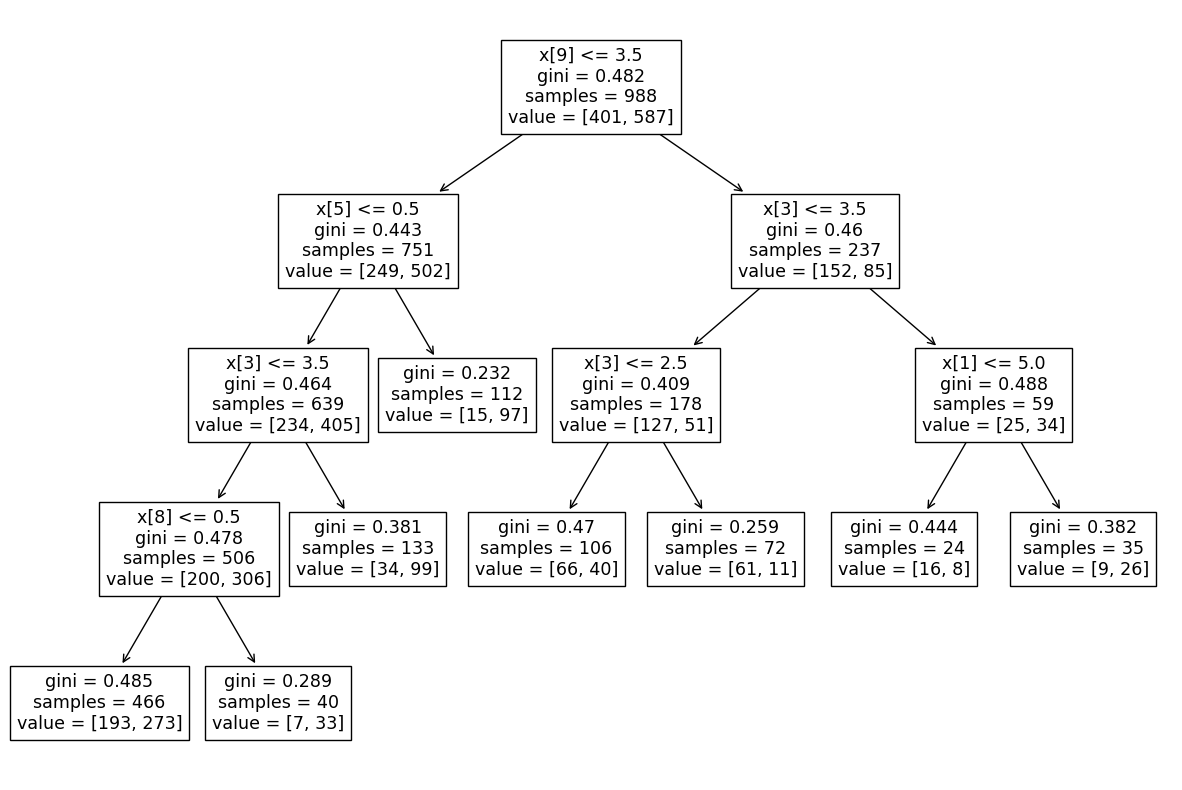

In [ ]:
_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_tree);

In [ ]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
y_predict = Dtree_tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

0.7006802721088435

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=6)

## split data into 3 fold


In [ ]:
X_train

,a1,a5,a81,a91,J5new,x1,x2,x3,x4,Gen_group
364,1.0,7.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,3.0
1564,2.0,3.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,3.0
1117,2.0,5.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0
716,2.0,5.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,1.0
380,1.0,6.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
629,2.0,3.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0
2046,2.0,7.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,4.0
232,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
727,2.0,8.0,4.0,2.0,9.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
y_test

742     0.0
103     1.0
1881    0.0
1215    1.0
1094    1.0
       ... 
120     1.0
790     1.0
382     1.0
1263    1.0
874     0.0
Name: q1, Length: 404, dtype: float64

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=4, random_state=6, shuffle=True)

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[   1    3    5 ... 1609 1610 1611]
  Test:  index=[   0    2    4   11   12   14   15   21   22   24   33   35   37   40
   50   52   55   56   58   59   60   71   73   79   83   88   92   93
   98  102  105  109  111  117  123  132  134  136  137  140  142  148
  150  152  155  157  168  171  176  178  179  184  186  187  191  195
  208  219  221  222  223  225  229  231  232  238  241  245  250  256
  257  261  263  264  268  271  273  286  287  288  290  291  297  302
  304  307  311  313  336  338  341  351  357  359  360  363  374  375
  379  381  386  396  400  402  406  408  412  421  427  429  430  433
  434  438  439  444  454  457  463  465  468  477  478  481  482  486
  488  497  498  499  500  502  503  504  508  510  512  515  516  519
  522  524  529  534  543  544  553  568  578  584  588  590  592  593
  595  596  597  600  603  605  608  613  628  629  636  649  657  674
  681  682  690  691  694  701  702  705  708  710  711  726  729  733
  7

### train 4 decision tree models and 1 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
results = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    result_f = {}
    #DT depth 3, cri gini
    Dtree1 = DecisionTreeClassifier( random_state = 6, criterion='gini' , max_depth = 3) #define
    Dtree1.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction1 = Dtree1.predict(np.array(X_train)[test_index])  #predict
    acc1 = accuracy_score(np.array(y_train)[test_index], prediction1)
    result_f['dt1'] = acc1

    #DT depth 5, cri gini
    Dtree2 = DecisionTreeClassifier( random_state = 6, criterion='gini' , max_depth = 5) #define
    Dtree2.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction2 = Dtree2.predict(np.array(X_train)[test_index])  #predict
    acc2 = accuracy_score(np.array(y_train)[test_index], prediction2) #evaluate
    result_f['dt2'] = acc2

    #DT depth 3, cri gain
    Dtree3 = DecisionTreeClassifier( random_state = 6, criterion='entropy' , max_depth = 3) #define
    Dtree3.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction3 = Dtree3.predict(np.array(X_train)[test_index])  #predict
    acc3 = accuracy_score(np.array(y_train)[test_index], prediction3) #evaluate
    result_f['dt3'] = acc3

    #DT depth 5, cri gain
    Dtree4 = DecisionTreeClassifier( random_state = 6, criterion='entropy' , max_depth = 5) #define
    Dtree4.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction4 = Dtree4.predict(np.array(X_train)[test_index])  #predict
    acc4 = accuracy_score(np.array(y_train)[test_index], prediction4) #evaluate
    result_f['dt4'] = acc4

    #Naive Bayes
    gnb = GaussianNB() #define
    gnb.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    predictionN = gnb.predict(np.array(X_train)[test_index])  #predict
    accN = accuracy_score(np.array(y_train)[test_index], predictionN) #evaluate
    result_f['NB'] = accN

    results.append(result_f)

In [ ]:
results

[{'dt1': 0.659919028340081,
  'dt2': 0.6356275303643725,
  'dt3': 0.6761133603238867,
  'dt4': 0.6437246963562753,
  'NB': 0.6194331983805668},
 {'dt1': 0.6761133603238867,
  'dt2': 0.6761133603238867,
  'dt3': 0.6761133603238867,
  'dt4': 0.6680161943319838,
  'NB': 0.4979757085020243},
 {'dt1': 0.6356275303643725,
  'dt2': 0.6558704453441295,
  'dt3': 0.6356275303643725,
  'dt4': 0.6639676113360324,
  'NB': 0.5910931174089069},
 {'dt1': 0.6680161943319838,
  'dt2': 0.6882591093117408,
  'dt3': 0.6761133603238867,
  'dt4': 0.6923076923076923,
  'NB': 0.5303643724696356}]

## find the best model from 3-fold cross validation

In [ ]:
print(f"averaged acc DT1 = { ( results[0]['dt1'] + results[1]['dt1'] + results[2]['dt1'])/3 }")
print(f"averaged acc DT2 = { ( results[0]['dt2'] + results[1]['dt2'] + results[2]['dt2'])/3 }")
print(f"averaged acc DT3 = { ( results[0]['dt3'] + results[1]['dt3'] + results[2]['dt3'])/3 }")
print(f"averaged acc DT4 = { ( results[0]['dt4'] + results[1]['dt4'] + results[2]['dt4'])/3 }")
print(f"averaged acc NB = { ( results[0]['NB'] + results[1]['NB'] + results[2]['NB'])/3 }")

averaged acc DT1 = 0.6572199730094467
averaged acc DT2 = 0.6558704453441295
averaged acc DT3 = 0.6626180836707153
averaged acc DT4 = 0.6585695006747638
averaged acc NB = 0.5695006747638326


## Evaluate on test

In [ ]:
gnb = GaussianNB() #define
gnb.fit(np.array(X_train),np.array(y_train))   #train
prediction_test = gnb.predict(np.array(X_test)) #predict
accTest = accuracy_score(np.array(y_test), prediction_test) #evaluate

print(f'model Naïve Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ {accTest}')

model Naïve Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ 0.5374149659863946


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [1],
    'min_samples_split': [5],
    'min_samples_leaf': [8],
    'max_features': [None, 'auto', 'sqrt'],
    'criterion': ['entropy']
}

# Create decision tree classifier
clf = DecisionTreeClassifier()

In [ ]:
# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 1, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 5}
Best score: 0.6619494436753319


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho